### Importing libraries

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Import the library for the decision tree model below

In [2]:
from sklearn import tree

### Loading the dataset

In [3]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names) 


###  Define X and y for the machine learning model 

In [5]:
X = dataset.drop(['Class'],axis =1)
y = dataset['Class']

### Train test split

In [ ]:
# set the random state in this step to ensure that same data is used when repeating model


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

### Define the classifier and fitting the train data


In [8]:
clf = tree.DecisionTreeClassifier()

In [9]:
clf = clf.fit(X_train, y_train)

### Obtain the prediction results from the decision tree model


In [10]:
pred = clf.predict(X_test)

In [11]:
accuracy_score(y_test,pred)

0.9777777777777777

### Drawing visual of Decision Tree with Gini Index

[Text(669.6, 684.9359999999999, 'X[3] <= 0.75\ngini = 0.666\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(566.5846153846154, 532.728, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(772.6153846153846, 532.728, 'X[3] <= 1.75\ngini = 0.499\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(412.0615384615385, 380.52, 'X[2] <= 4.95\ngini = 0.198\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(206.03076923076924, 228.312, 'X[3] <= 1.6\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(103.01538461538462, 76.10399999999993, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(309.04615384615386, 76.10399999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(618.0923076923077, 228.312, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(515.0769230769231, 76.10399999999993, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(721.1076923076923, 76.10399999999993, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(1133.1692307692308, 380.52, 'X[2] <= 4.85\ngini = 

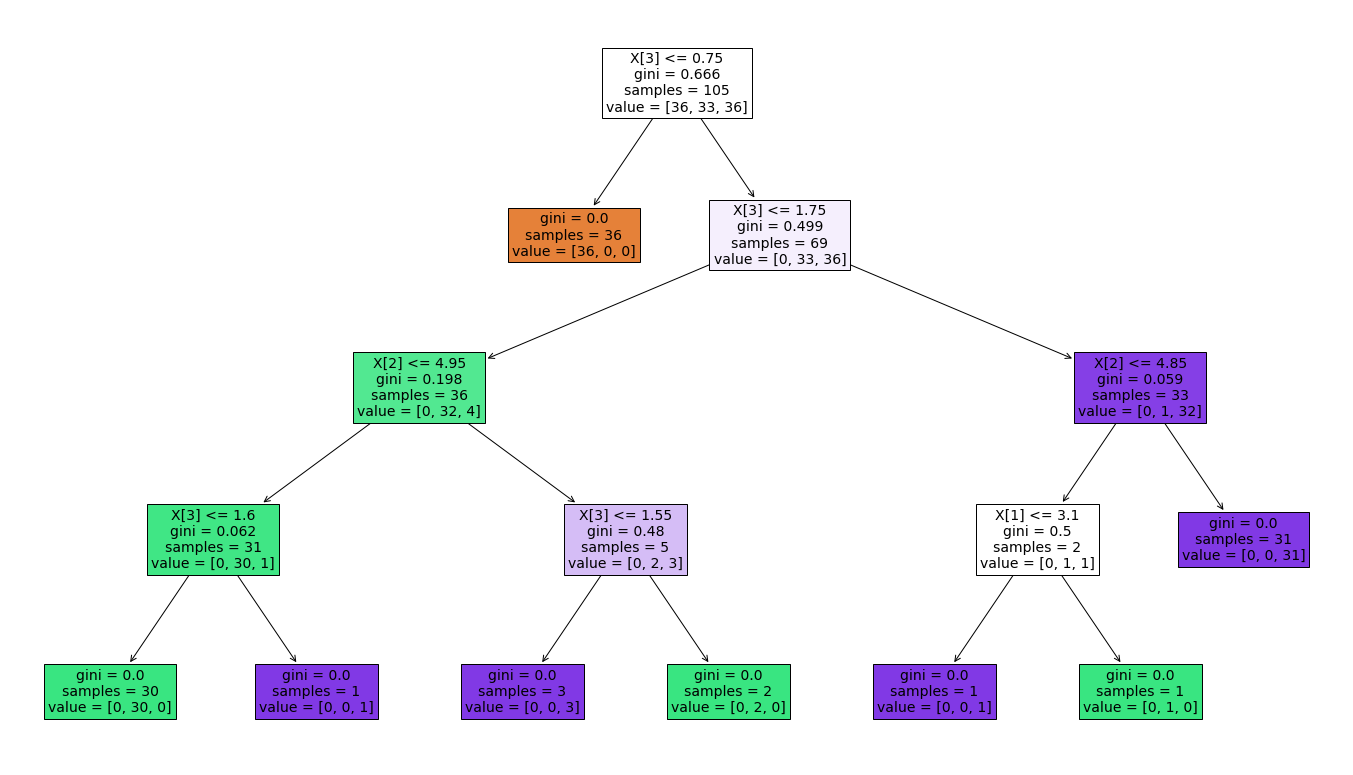

In [12]:
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)

### Use Grid search to obtain the best max_depth

In [20]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {
    'max_depth' : [1, 2, 3, 4,5,6,7,8,10],
}

In [16]:
clf_1 = tree.DecisionTreeClassifier(random_state=10)

In [17]:
gs = GridSearchCV(clf_1, 
                  param_grid, 
                  cv=5,
                  scoring='accuracy'
                  )

In [19]:
gs.fit(X_train, y_train)

ValueError: Invalid parameter metric for estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

### Reference 
[Hyperparameters of Decision Trees Explained with Visualizations](https://towardsdatascience.com/hyperparameters-of-decision-trees-explained-with-visualizations-1a6ef2f67edf)